# Week X - Pandas DataFrames

<hr style="border:2px solid gray">

# Index: <a id='index'></a>
1. [Introduction to Pandas](#pandas)
1. [Creating a DataFrame](#create)
1. [Manipulating DataFrames](#manipulate)
1. [Displaying Data](#display)
1. [Reading Data from Files](#files)
1. [Worked Example](#worked)

<hr style="border:2px solid gray">

# Section One: Introduction to Pandas  [^](#index) <a id='pandas'></a>

**Pandas** is a Python library for data manipulation, analysis and display. Pandas has two data formats: the **Series** and the **DataFrame**, however it is the DataFrame that is most commonly used and thus what we will focus on today.

DataFrames are a tabular data structure, a bit like Excel spreadsheets (and you can read and write spreadsheets to and from pandas DataFrames). 

There are many online resources for pandas to inprove your fluency, such as [w3schools](https://www.w3schools.com/python/pandas/pandas_dataframes.asp). This worksheet aims to give a simple and brief overview.

<hr style="border:2px solid gray">

## Section Two: Creating a DataFrame  [^](#index) <a id='create'></a>

A DataFrame is a 2D data structure that is composed of the following components:
- The data
- The index - This is the row number of the DataFrame
- The columns - These are labelled with headers

The information at the 'top' of the DataFrame contains are known as **headers**. These allow you to access your data without needing to use indices. The cell below shows two equivalent ways to create a DataFrame.

In [32]:
import pandas as pd

# Method 1: Set data as dictionary structure. Data formatted in columns

data={'Name':["Rex","Bruno","Biffa","Queeny", "Bob"],
     'Breed':["bulldog","labrador","doberman","poodle", "pug"],
     'Age':[2,4,12,0.5, 7]}

dogs=pd.DataFrame(data)

display(dogs)

# Method 2: Splitting Headers and data. Data formatted in rows

d=[["Rex","bulldog",2],
    ["Bruno","labrador",4],
    ["Biffa", "doberman", 12],
    ["Queeny","poodle", 0.5],
    ["Bob", "pug", 7]]

Headers=['Name', 'Breed', 'Age']

dogs2=pd.DataFrame(data=d,columns=Headers)

display(dogs2)

,Name,Breed,Age
0,Rex,bulldog,2.0
1,Bruno,labrador,4.0
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5
4,Bob,pug,7.0


,Name,Breed,Age
0,Rex,bulldog,2.0
1,Bruno,labrador,4.0
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5
4,Bob,pug,7.0


The first column is the **index**, and you can be used to specify which rows of data you want to display. 

Using ```display``` rather than ```print``` results in nicer formatting.

In [33]:
display(dogs[2:4])
print(dogs[2:4])
print ()
print(type(dogs[2:4]))

,Name,Breed,Age
2,Biffa,doberman,12.0
3,Queeny,poodle,0.5


     Name     Breed   Age
2   Biffa  doberman  12.0
3  Queeny    poodle   0.5

<class 'pandas.core.frame.DataFrame'>


An alternative way to access a row of data is through the `df.loc` method (loc stands for location), where df is replaced by th DataFrame of interest. Note that in the first example, the printed data is stored in a pandas Series.

In [41]:
display(dogs.loc[0]) 
print()
print(type(dogs.loc[0]))
print()
display(dogs.loc[[0,1]]) 
print()
print(type(dogs.loc[[0,1]]))

Name         Rex
Breed    bulldog
Age          2.0
Name: 0, dtype: object


<class 'pandas.core.series.Series'>



,Name,Breed,Age
0,Rex,bulldog,2.0
1,Bruno,labrador,4.0



<class 'pandas.core.frame.DataFrame'>


We can use the names of the headers to display particular columns. If the name is a simple string, we can use the `df.header` method, else we can use square brackets.

In [49]:
display(dogs.Name)
display(dogs[['Breed', 'Age']])

a       Rex
b     Bruno
c     Biffa
d    Queeny
e       Bob
Name: Name, dtype: object

,Breed,Age
a,bulldog,2.0
b,labrador,4.0
c,doberman,12.0
d,poodle,0.5
e,pug,7.0


It is possible to change the index to something more relevant, although our example DataFrame does not lend itself well to this.

Note that in this example, the data is displayed up to and including 'b' and 'd' (unlike in the celle above, where only two rows were displayed).

We can also use loc to access a particular row based on the index. If we want to access a row based on its position (such as how the data was indexed before), we can use the `iloc` argument. This stands for **integer location**.

In [45]:
dogs=pd.DataFrame(data,index=["a","b","c","d", "e"])
display(dogs["b":"d"]) 
display(dogs.loc["b":"d"])
display(dogs.iloc[2:4]) # Does not include index 4 row


,Name,Breed,Age
b,Bruno,labrador,4.0
c,Biffa,doberman,12.0
d,Queeny,poodle,0.5


,Name,Breed,Age
b,Bruno,labrador,4.0
c,Biffa,doberman,12.0
d,Queeny,poodle,0.5


,Name,Breed,Age
c,Biffa,doberman,12.0
d,Queeny,poodle,0.5


To insert a new column into the DataFrame, simply perform:

In [6]:
dogs["Length"]=[50,100,105,85, 40]
display(dogs)

,Name,Breed,Age,Length
a,Rex,bulldog,2.0,50
b,Bruno,labrador,4.0,100
c,Biffa,doberman,12.0,105
d,Queeny,poodle,0.5,85
e,Bob,pug,7.0,40


You can even create columns that are functions of other columns. Pandas performs this very quickly. 

In [7]:
dogs["combination"]=dogs.Age*dogs.Length
display(dogs)

,Name,Breed,Age,Length,combination
a,Rex,bulldog,2.0,50,100.0
b,Bruno,labrador,4.0,100,400.0
c,Biffa,doberman,12.0,105,1260.0
d,Queeny,poodle,0.5,85,42.5
e,Bob,pug,7.0,40,280.0


<hr style="border:2px solid gray">

# Section Three: Manipulating DataFrames  [^](#index) <a id='manipulate'></a>

### Filtering DataFrames
Here we are choosing to display all dogs above a given age.

In [8]:
display(dogs[dogs.Age > 6])

,Name,Breed,Age,Length,combination
c,Biffa,doberman,12.0,105,1260.0
e,Bob,pug,7.0,40,280.0


### Statistical Analysis
You can calculate things like the correlation and covariance matrices. Note that the keyword 'numeric_only' will only work if you are running pandas 1.5.0 or higher

In [9]:
display(dogs.corr(numeric_only = True))
display(dogs.cov(numeric_only = True))

,Age,Length,combination
Age,1.000000,0.268931,0.921530
Length,0.268931,1.000000,0.583193
combination,0.921530,0.583193,1.000000


,Age,Length,combination
Age,20.800,36.125,2070.125
Length,36.125,867.500,8460.625
combination,2070.125,8460.625,242611.250


<hr style="border:2px solid gray">

# Section Four: Displaying Data  [^](#index) <a id='display'></a>


It is possible to display your DataFrame content quite easily. Here we will cover a few common examples.

### Basic plotting

Two display a basic plot of our data, we can use:
```python
df['column name'].plot()
```

or:

```python
df.plot('x column name','y column name')
```
Wee only need to reference the name of the column, we don't need to know its index. For the first method we didn't set an x-axis; with that plotting nomenclature Pandas will use whatever the index is as an x-axis. 

<div style="background-color:#C2F5DD">

## Exercise
Experiment with these methods of data plotting using our 'dogs' DataFrame.


Other useful data visualisation:
### Histograms

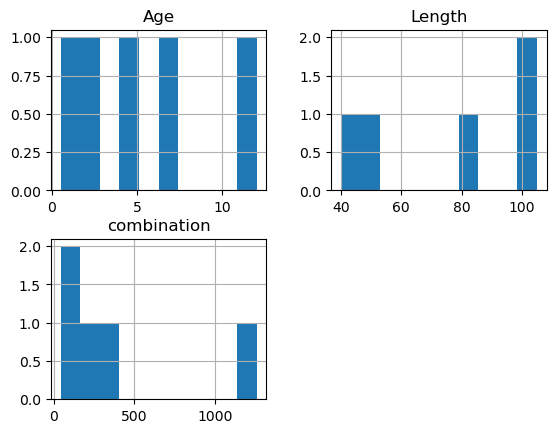

In [10]:
import numpy as np
import scipy as sp
import pylab as pl

histogram=dogs.hist()

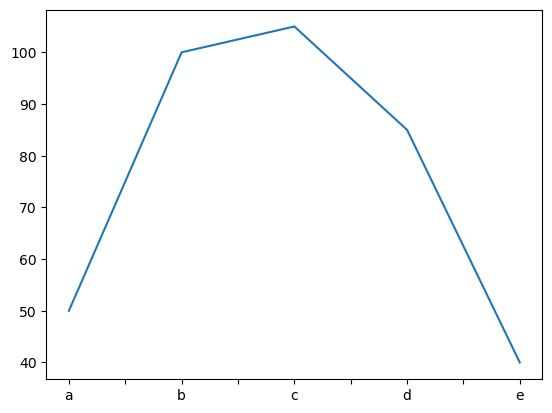

In [13]:
dogs['Length'].plot()
pl.show()

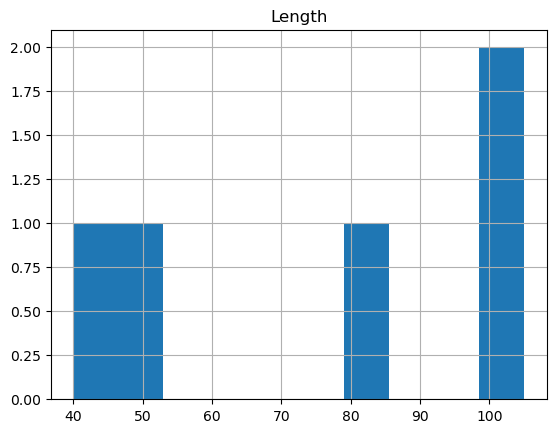

In [14]:
h1=dogs.hist(column="Length")

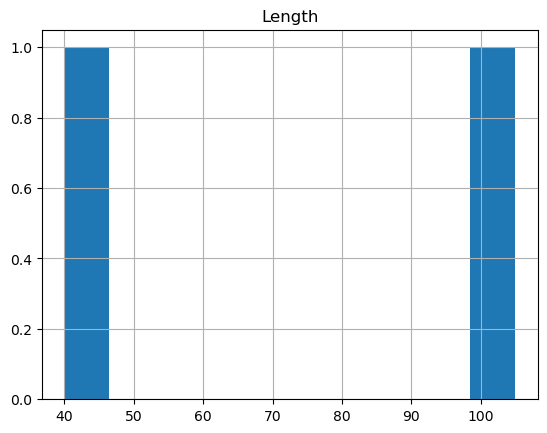

In [16]:
dogs[dogs.Age>6].hist(column="Length")
pl.show()

### Scatter Plots

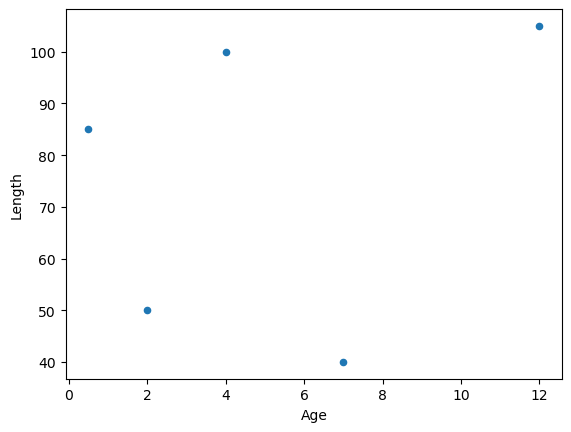

In [18]:
dogs.plot(kind="scatter",x="Age",y="Length",alpha=1) 
pl.show()

#alpha controls the opacity of data points. 
#For larger amounts of data, setting alpha to a lower value can make the plot easier to interpret

A **scatter_matrix** displays all possible combinations of the scatter plots, as well as the various histograms. Run the cell below to see what this looks like for our data. Just like with any pandas plot, this can also be filtered.

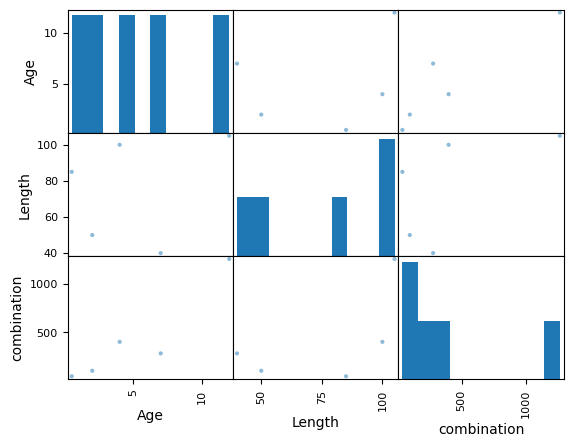

In [20]:
import pandas.plotting as pdp
pdp.scatter_matrix(dogs)
pl.show()

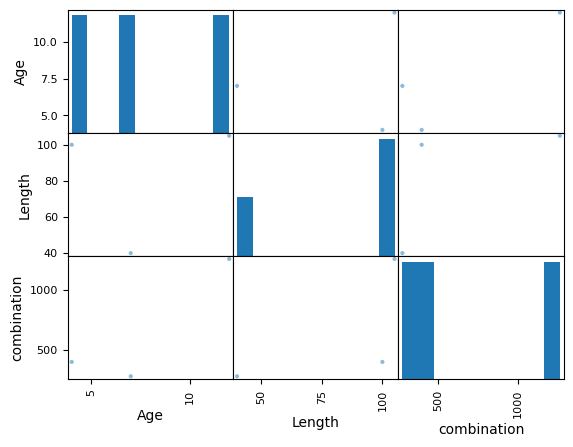

In [22]:
pdp.scatter_matrix(dogs[dogs.Age>3])
pl.show()

Further example of plots can be found [here](https://pandas.pydata.org/docs/user_guide/visualization.html)

<div style="background-color:#C2F5DD">

### Exercise

The purpose of this exercise is to get you to play around with pandas DataFrame and to consolidate the knowledge that you already have. 

* Generate 5 samples with 100,000 correlated random numbers distributed according to Gaussian distributions (you can choose whatever covariance matrix that you like). See worksheet [] if you require a refresher.

* Read these into a DataFrame

* Create a 6th column in your DataFrame: the values should be the second column plus the fourth column

* Verify that the covariance (and correlation) matrices are what you would expect 

* Display your data

<hr style="border:2px solid gray">

# Section Five: Reading Data from Files  [^](#index) <a id='files'></a>

You can read data from all sorts of files (csv, excel, etc) into a DataFrames. Sometimes, especially with a csv file, you have to be careful with the separator.

In [23]:
students=pd.read_excel(r'student-por.xlsx') 
#'r' refers to raw string, it is required to read in the file with no bugs

In [24]:
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


This will display a lot of information. We can reduce this display and make the data easier to interpret at a glance using the `head()` and `tail()` methods. To get a top level summary of the data, we can use the `info()` method. For example:

In [4]:
display(students.head())

print ('\n And the summary of the data: \n')

display(students.info())

NameError: name 'students' is not defined

## Worked Example [^](#index)  <a id='worked'></a>

Below we will work through an example, working with a larger dataset. In this case, we are looking at different characteristics of concrete, using the file: concrete_data.csv

In [6]:
import pandas as pd

Firstly, we read in the data, and inspect the first and final 5 rows.

In [15]:
concrete = pd.read_csv('concrete_data.csv')
concrete

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


Often we will have to deal with missing data, also known as null values. Missing values show up as NaN in our DataFrame, which stands for "not a number". We can check whether any of our columns have missing data using the `isnull()` method and the `any()` method. Below, we firstly perform `isnan()` on our dataset which turns every entry in the DataFrame to a boolean: `True` if the entry is "NaN"

In [11]:
import numpy as np

In [19]:
concrete.isnull().any()

Cement                False
Blast Furnace Slag    False
Fly Ash               False
Water                 False
Superplasticizer      False
Coarse Aggregate      False
Fine Aggregate        False
Age                   False
Strength              False
dtype: bool

<div style="background-color:#C2F5DD">

## Quick Exercise

Luckily, we can see that our dataset does not have any null values. For the sake of practice, we will insert some into the DataFrame.

Use the `np.nan` object to set a few of the entries in `concrete` to NaN and run `concrete.isnull.any()` again to inspect.
Then, read the documentation on the `pd.DataFrame.dropna()` method, and remove the rows containing a null datapoints.

We see that instances of data have a 'Fly Ash' value of zero. Let's say we only want cement with a non-zero value for 'Fly Ash':

In [25]:
concrete[concrete['Fly Ash']==0].shape

(566, 9)

So we see that 566 rows have a value of 0 for 'Fly Ash'. Let's now get rid of these rows.

In [28]:
concrete = concrete[concrete['Fly Ash']>0]
concrete

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
184,222.4,0.0,96.7,189.3,4.5,967.1,870.3,3,11.58
185,222.4,0.0,96.7,189.3,4.5,967.1,870.3,14,24.45
186,222.4,0.0,96.7,189.3,4.5,967.1,870.3,28,24.89
187,222.4,0.0,96.7,189.3,4.5,967.1,870.3,56,29.45
188,222.4,0.0,96.7,189.3,4.5,967.1,870.3,100,40.71
...,...,...,...,...,...,...,...,...,...
1022,264.5,111.0,86.5,195.5,5.9,832.6,790.4,28,41.54
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70


If we weren't worried about the age of the concrete, we could drop the age column, like so:

In [36]:
concrete = concrete.drop(columns='Age')

,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
184,0.0,96.7,189.3,4.5,967.1,870.3,11.58
185,0.0,96.7,189.3,4.5,967.1,870.3,24.45
186,0.0,96.7,189.3,4.5,967.1,870.3,24.89
187,0.0,96.7,189.3,4.5,967.1,870.3,29.45
188,0.0,96.7,189.3,4.5,967.1,870.3,40.71
...,...,...,...,...,...,...,...
1022,111.0,86.5,195.5,5.9,832.6,790.4,41.54
1025,116.0,90.3,179.6,8.9,870.1,768.3,44.28
1026,0.0,115.6,196.0,10.4,817.9,813.4,31.18
1027,139.4,108.6,192.7,6.1,892.4,780.0,23.70


We can get a fairly comprehensive summary of our data using the `describe()` method.

In [41]:
concrete.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
count,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000,464.000000
mean,241.072198,41.918750,120.288793,175.407759,8.826078,972.384052,784.226509,34.654461
std,84.426347,59.306286,33.675470,19.444950,3.385847,78.579191,65.290900,14.234035
min,132.000000,0.000000,24.500000,121.800000,0.000000,801.000000,612.000000,7.320000
25%,172.400000,0.000000,97.850000,160.600000,6.400000,924.550000,749.225000,24.212500
50%,218.900000,0.000000,121.400000,174.000000,8.850000,987.800000,780.200000,33.745000
75%,277.200000,93.400000,141.000000,188.700000,11.000000,1029.550000,824.000000,44.280000
max,505.000000,214.000000,200.100000,247.000000,22.100000,1098.000000,905.900000,76.240000


We see that each feature of the data has different mean and standard deviation. Many machine learning algorithms you will use require data to be standardized - with a mean of 0 and variance (and hence standard deviation) of 1. So we'll do this below.

In [83]:
for column in concrete.columns:
    concrete[column] = (concrete[column] -
                           concrete[column].mean()) / concrete[column].std()
concrete

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Strength
184,-0.221166,-0.706818,-0.700474,0.714440,-1.277694,-0.067245,1.318308,-1.621077
185,-0.221166,-0.706818,-0.700474,0.714440,-1.277694,-0.067245,1.318308,-0.716906
186,-0.221166,-0.706818,-0.700474,0.714440,-1.277694,-0.067245,1.318308,-0.685994
187,-0.221166,-0.706818,-0.700474,0.714440,-1.277694,-0.067245,1.318308,-0.365635
188,-0.221166,-0.706818,-0.700474,0.714440,-1.277694,-0.067245,1.318308,0.425427
...,...,...,...,...,...,...,...,...
1022,0.277494,1.164822,-1.003365,1.033288,-0.864208,-1.778894,0.094554,0.483738
1025,0.418445,1.249130,-0.890523,0.215595,0.021833,-1.301668,-0.243932,0.676234
1026,0.960930,-0.706818,-0.139235,1.059002,0.464853,-1.965966,0.446823,-0.244095
1027,-1.096485,1.643692,-0.347101,0.889292,-0.805139,-1.017878,-0.064734,-0.769596


<div style="background-color:#C2F5DD">

## Quick exercise

Using the `to_csv` method, export the preprocessed data as a csv.

Finally, say we want to use our data to build a regression model, to predict the strength of a piece of concrete, given its characteristics. We can split our data into 'predictors' and 'outcomes'.

In [43]:
predictors = concrete.drop(columns='Strength')
outcomes = concrete['Strength']

In [25]:
predictors.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13



 And the summary of the data: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 n

None

In [ ]:
outcomes.head()

<div style="background-color:#C2F5DD">

## Exercise 

These data are taken from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Student+Performance#)

Read the description of student data and then read in the data set to analyse this data. What are the most important factors that determine a student's scores? What are the least important? What other correlations do you see here (look at data values that aren't simply numerical as well as those that are). 